In [22]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
%matplotlib inline

In [23]:
data = pd.read_csv('Image-Segmentation.csv', sep=',',header=0)
features = ['REGION-CENTROID-COL','REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5',
           'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN',
           'RAWRED-MEAN', "RAWBLUE-MEAN", 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 
           'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']
cleanup_nums = {"LABEL":{"BRICKFACE": 0, "CEMENT": 1, "FOLIAGE": 2, "GRASS": 3, "PATH": 4, "SKY": 5, "WINDOW": 6}}
data.replace(cleanup_nums, inplace=True)

X = data[features]
y = data['LABEL']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print ("The number of features in the dataset is 19.") 
print ("The number of observations are: " + str(len(y)))
print (np.unique(y, return_counts=True))


The number of features in the dataset is 19.
The number of observations are: 2310
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([330, 330, 330, 330, 330, 330, 330], dtype=int64))


C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [24]:
clf = KNeighborsClassifier()
score = cross_val_score(X=X, y=y, estimator=clf, cv=10)
print (score.mean())

0.9264069264069263


# ANN
## Get Baseline so that we can see if there is any improvement

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

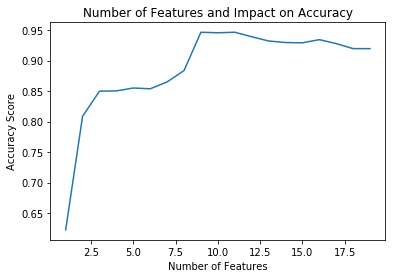

In [10]:
# Graph realationship between the number of features and their 
# impact on accuracy.
# dementions of the feature matrix: 3168 x 20
features = []
acc = []

# loop throught the features to determine number of features vs. accuracy
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = 6)
    best_feature_selection = SelectKBest(mutual_info_classif, k=i).fit_transform(X, y)
    scores = cross_val_score(knn, best_feature_selection, y, cv=10)
    features.append(i)
    acc.append(scores.mean())
    
# Plot the realation between the number of features and accuracy
plt.plot(features, acc)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.title("Number of Features and Impact on Accuracy")
plt.savefig("feature_selection Image-Segmentation ANN.png")

# optimal number of feature that seems to to be 9

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

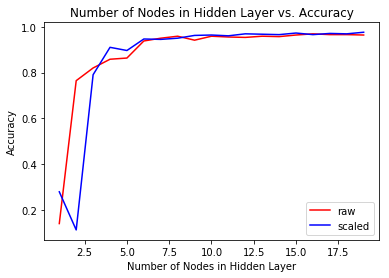

Complete
Raw/Unscaled Accuracy:  0.8865416135494446
Scaled Accuracy:  0.8669641231105446


<Figure size 14400x14400 with 0 Axes>

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

features_selected = SelectKBest(mutual_info_classif, k=9).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(features_selected, y)


nodes_list = []
accuracies = []
accuracies_features_selected = []

# # test and record the accuracies as the number of nodes increases.
for nodes in range(1,20,1):
    mlp = MLPClassifier(hidden_layer_sizes=(nodes,nodes,nodes))
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    nodes_list.append(nodes)
    accuracies.append(accuracy)
    
    mlp2 = MLPClassifier(hidden_layer_sizes=(nodes,nodes,nodes))
    mlp2.fit(X_train_selected, y_train_selected)
    predictions = mlp2.predict(X_test_selected)
    accuracy = accuracy_score(y_test_selected, predictions)
    accuracies_features_selected.append(accuracy)

# plot the impact of increase the node count has on accuracy of the scaled set
# and the unscaled set.

plt.plot(nodes_list, accuracies, "r", label="raw")
plt.plot(nodes_list, accuracies_features_selected, "b", label="scaled")
plt.legend()
plt.xlabel("Number of Nodes in Hidden Layer")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = [200, 200]
plt.title("Number of Nodes in Hidden Layer vs. Accuracy")
plt.show()
plt.savefig("Number_of_Nodes_in_Hidden_Layer_vs._Accuracy IS.png")

print("Complete")
print("Raw/Unscaled Accuracy: ", sum(accuracies)/len(accuracies))
print("Scaled Accuracy: ", sum(accuracies_features_selected)/len(accuracies_features_selected))


C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

Complete
Complete
Raw/Unscaled Accuracy:  0.8518484793298124
Scaled Accuracy:  0.8472955745765798


C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


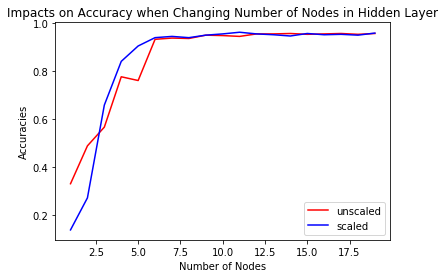

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

features_selected = SelectKBest(mutual_info_classif, k=9).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(features_selected, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

acc_feature_scaled = []
acc = []
nodes_list = []

for nodes in range(1,20,1):
    mlp = MLPClassifier(hidden_layer_sizes=(nodes,nodes,nodes))
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    nodes_list.append(nodes)
    acc.append(accuracy)
    
    mlp2 = MLPClassifier(hidden_layer_sizes=(nodes,nodes,nodes))
    mlp2.fit(X_train_scaled, y_train)
    predictions = mlp2.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    acc_feature_scaled.append(accuracy)
    

plt.plot(nodes_list, acc,'r', label='unscaled')
plt.plot(nodes_list, acc_feature_scaled,'b', label='scaled')
plt.legend()
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.title('Impacts on Accuracy when Changing Number of Nodes in Hidden Layer')
plt.savefig('impacts_on_accuracy_when_changin_no_of_nodes_in_hidden_layer_ANN.png')

print ('Complete')
print("Complete")
print("Raw/Unscaled Accuracy: ", sum(acc)/len(acc))
print("Scaled Accuracy: ", sum(acc_feature_scaled)/len(acc_feature_scaled))

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

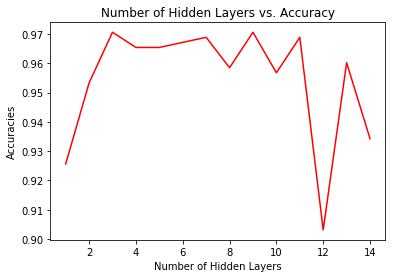

In [26]:
features_selected = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(features_selected, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layers_tuple = (10,)
accuracies = []
hidden_layers = []

for hidden in range(1,15):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers_tuple)
    mlp.fit(X_train_scaled,y_train)
    predictions = mlp.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    hidden_layers.append(hidden)
    accuracies.append(accuracy)
    
    hidden_layers_tuple = hidden_layers_tuple + (10,)
    
plt.plot(hidden_layers, accuracies,'r')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracies")
plt.title("Number of Hidden Layers vs. Accuracy")
plt.savefig("ANN_Number_of_Hidden_Layers_vs._Accuracy.png")


In [28]:
feature_matrix_train, feature_matrix_test, output_train, output_test = train_test_split(features_selected, y)
knn = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
knn.fit(feature_matrix_train, output_train)
prediction = knn.predict(feature_matrix_test)
score = knn.score(feature_matrix_test, output_test)

print(score)

0.9602076124567474


C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


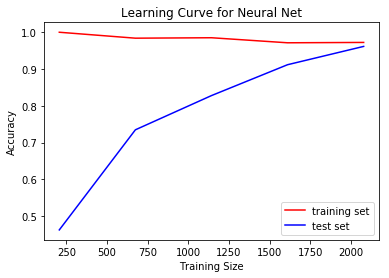

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
%matplotlib inline

features_selected = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_selected, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'r', label='training set')
plt.plot(train_sizes, test_scores_mean, 'b', label='test set')
plt.legend()
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Neural Net")
plt.savefig('learning_curve_for_neural_net.png')
plt.show()

## K-Means and EM Visualization Code

In [31]:
import itertools

from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange','black', 'green', 'red'])

def plot_results_EM(X, Y_, means, covariances, index, title):
    _, splot = plt.subplots(1, sharex=True)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], s=2,color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-3., 3.)
    #plt.ylim(-1., 6.)
    plt.title(title)
    plt.savefig(title +'.png')
    plt.show()
    

def draw_kmeans(X, labels, centroids, clusters, title):
    _, ax1 = plt.subplots(1, sharex=True)
    

    for i in range(clusters):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
        ax1.scatter(ds[:,0],ds[:,1],s=2)
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    plt.title(title)
    plt.savefig(title +'.png')
    plt.show()
    

### K-Means Varying the Number of Cluster vs. Adjusted Random Score

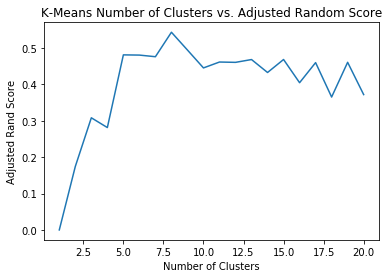

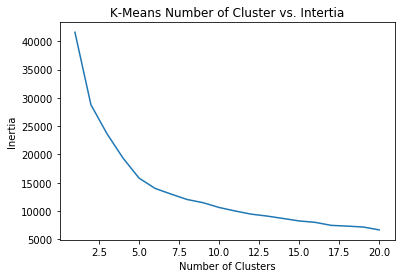

The best adjusted rand score is with 8 clusters.
The minimum inertia is with 20 clusters.


In [34]:
clusters = []
scores = []
inertias = []
for cluster in range(1,21):
    clusters.append(cluster)
    kmeans = KMeans(n_clusters=cluster).fit(X)
    labels_pred = kmeans.labels_
    inertia = kmeans.inertia_
    inertias.append(inertia)
    rand_score = metrics.adjusted_rand_score(labels_pred, y)
    scores.append(rand_score)
    
plt.plot(clusters, scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Score")
plt.title('K-Means Number of Clusters vs. Adjusted Random Score')
plt.savefig('K-Means Num of Clusters vs. Adjusted Random Score.png')
plt.show()

plt.plot(clusters, inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('K-Means Number of Cluster vs. Intertia')
plt.savefig('K-Means Num of Clusters vs. Intertia.png')
plt.show()


maximum_index = scores.index(max(scores))
print ("The best adjusted rand score is with " + str(clusters[maximum_index]) + " clusters.")

minimum_index_inertia = inertias.index(min(inertias))
print ("The minimum inertia is with " + str(clusters[minimum_index_inertia]) + " clusters.")


0.5484929724667288


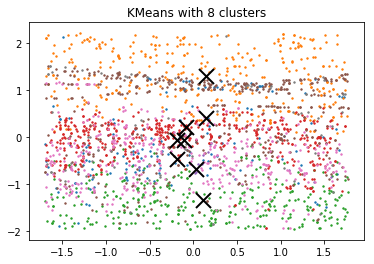

0.5352618364952845


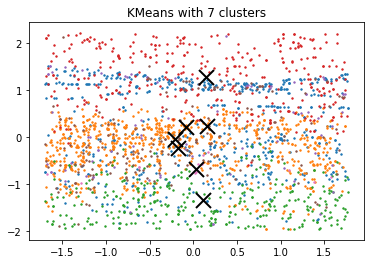

In [37]:
kmeans = KMeans(n_clusters=8).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print (metrics.homogeneity_score(y, labels))
draw_kmeans(X, labels, centroids, 8, "KMeans with 8 clusters")

kmeans = KMeans(n_clusters=7).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print (metrics.homogeneity_score(y, labels))
draw_kmeans(X, labels, centroids, 7, "KMeans with 7 clusters")


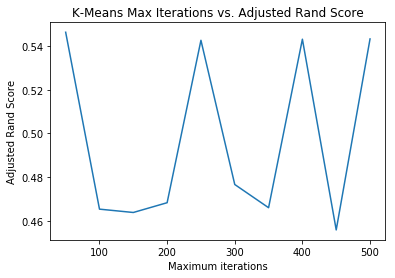

In [46]:
iterations = range(50, 550, 50)
scores = []

for iter in iterations:
    #print (iter)
    kmeans = KMeans(n_clusters=8, max_iter=iter).fit(X)
    labels_pred = kmeans.labels_
    rand_score = metrics.adjusted_rand_score(labels_pred, y)
    scores.append(rand_score)
    
plt.plot(iterations, scores)
plt.xlabel("Maximum iterations")
plt.ylabel("Adjusted Rand Score")
plt.title('K-Means Max Iterations vs. Adjusted Rand Score')
plt.savefig('k-means max Iterations vs. Adjusted Rand Score.png')
plt.show()

### Expectation Maximization

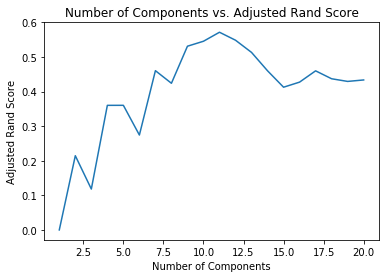

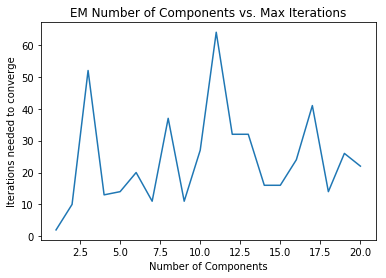

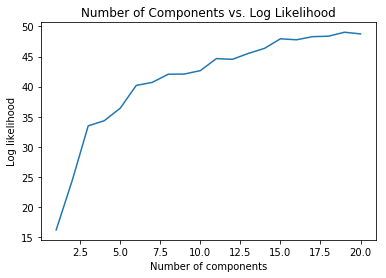

Maximum rand score reached with components: 11
[16.186193428563044, 24.381785926212352, 33.48323141066169, 34.3274564061313, 36.42021450095909, 40.2004152087785, 40.70711670896647, 42.06174355254489, 42.08976370710525, 42.65753002451425, 44.656102579625205, 44.53486139784102, 45.523218991006594, 46.35221356402307, 47.950564305414545, 47.78342697025867, 48.30038269285362, 48.382041960787376, 49.037189168529686, 48.762701376315405]


In [48]:
scores = []
components = []
iterations_needed_to_converge = []
log_likelihood = []

for component in range(1,21):
    em = GaussianMixture(n_components=component, random_state=0).fit(X)
    labels = em.predict(X)
    iters = em.n_iter_
    lower_bound = em.lower_bound_
    score = metrics.adjusted_rand_score(labels, y)
    scores.append(score)
    components.append(component)
    log_likelihood.append(lower_bound)
    iterations_needed_to_converge.append(iters)
    
plt.plot(components, scores)
plt.xlabel("Number of Components")
plt.ylabel("Adjusted Rand Score")
plt.title('Number of Components vs. Adjusted Rand Score')
plt.savefig('EM Number of Components vs. Adjusted Rand Score.png')
plt.show()

plt.plot(components, iterations_needed_to_converge)
plt.xlabel("Number of Components")
plt.ylabel("Iterations needed to converge")
plt.title('EM Number of Components vs. Max Iterations')
plt.savefig('EM Number of Components vs. Max Iterations.png')
plt.show()

plt.plot(components, log_likelihood)
plt.xlabel("Number of components")
plt.ylabel("Log likelihood")
plt.title('Number of Components vs. Log Likelihood')
plt.savefig('EM Number of Components vs. Log Likelihood.png')
plt.show()

maximum_index = scores.index(max(scores))
print ("Maximum rand score reached with components: " + str(components[maximum_index]))
print (log_likelihood)

0.6257002651634592


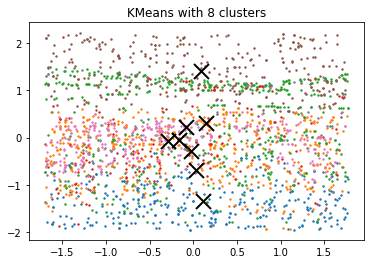

0.6765236999794402


C:\Users\Balkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Balkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


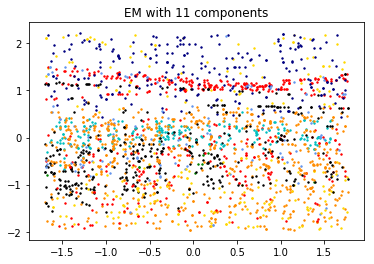

In [52]:
kmeans = KMeans(n_clusters=9).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print (metrics.homogeneity_score(y, labels))
draw_kmeans(X, labels, centroids, 7, "KMeans with 7 clusters")

em = GaussianMixture(n_components=11).fit(X)
print(metrics.homogeneity_score(y,em.predict(X)))
plot_results_EM(X, em.predict(X), em.means_, em.covariances_, 11, "EM with 11 components")


### PCA

In [53]:
pca = PCA().fit(X)
print (pca.explained_variance_ratio_.cumsum())

## So we can see that PCA has a great effect on our features. 
## 42% of the variance is explained by only one feature
## 58% by two features
## 69% by three features
## 94% by 9 features 
## I am using 94% variance as the cutoff in my case as 9 features is not much given the dataset size. 


print ("Now with only the best 9 features")
pca = PCA(n_components=9).fit(X)
print (pca.explained_variance_ratio_.cumsum())

[0.42341135 0.58544784 0.68504234 0.74361518 0.79559514 0.84609887
 0.88651302 0.91771445 0.94771247 0.96966275 0.98388365 0.99381892
 0.99998259 1.         1.         1.         1.         1.
 1.        ]
Now with only the best 9 features
[0.42341135 0.58544784 0.68504234 0.74361518 0.79559514 0.84609887
 0.88651302 0.91771445 0.94771247]


Maximum rand score reached with PCA features: 13


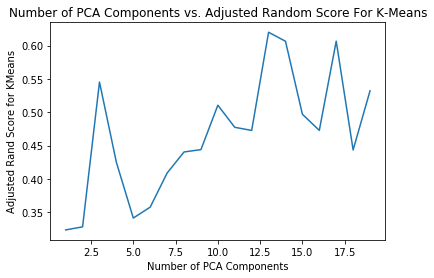

In [55]:
scores = []
pca_components = range(1,20,1)
all_intertia = []

for pc in pca_components:
    pca = PCA(n_components=pc).fit(X)
    features = pca.transform(X)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    kmeans = KMeans(n_clusters=9).fit(features_scaled)
    score = metrics.adjusted_rand_score(y, kmeans.labels_)
    inertia = kmeans.inertia_
    all_intertia.append(inertia)
    scores.append(score)
    
maximum_index = scores.index(max(scores))
print ("Maximum rand score reached with PCA features: " + str(pca_components[maximum_index]))

plt.plot(pca_components, scores)
plt.xlabel("Number of PCA Components")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Number of PCA Components vs. Adjusted Random Score For K-Means')
plt.savefig('Number of PCA Components vs. Adjusted Random Score For K-Means.png')
plt.show()

# plt.plot(pca_components, all_intertia)
# plt.xlabel("Number of PCA Components")
# plt.ylabel("Inertia")
# plt.show()

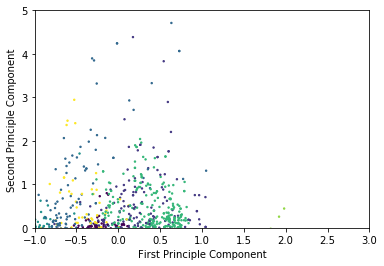

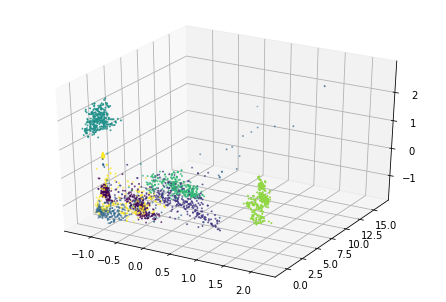

In [56]:
pca = PCA(n_components=3).fit(X)
features = pca.transform(X)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

pca1, pca2, pca3 = zip(*features_scaled)

axes = plt.gca()
axes.set_xlim([-1.0,3.0])
axes.set_ylim([0.0,5.0])

plt.scatter(pca1, pca2, s=2, c=y)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

ax = Axes3D(fig=plt.figure())

ax.scatter(xs=pca1,ys=pca2,zs=pca3,s=1,c=y)

Maximum rand score reached with PCA features: 13


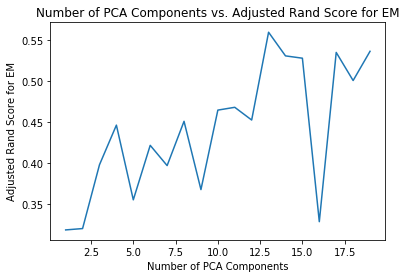

In [59]:
scores = []
pca_components = range(1,20,1)
all_intertia = []

for pc in pca_components:
    pca = PCA(n_components=pc).fit(X)
    features = pca.transform(X)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    em = GaussianMixture(n_components=11).fit(features_scaled)
    labels = em.predict(features_scaled)
    score = metrics.adjusted_rand_score(y, labels)
    scores.append(score)
    
maximum_index = scores.index(max(scores))
print ("Maximum rand score reached with PCA features: " + str(pca_components[maximum_index]))

plt.plot(pca_components, scores)
plt.xlabel("Number of PCA Components")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Number of PCA Components vs. Adjusted Rand Score for EM')
plt.savefig('Number of PCA Components vs. Adjusted Rand Score for EM.png')
plt.show()

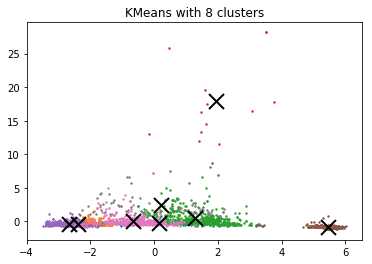

C:\Users\Balkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


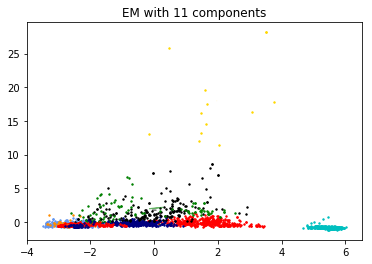

In [60]:
pca = PCA(n_components=13).fit(X)
features = pca.transform(X)


kmeans = KMeans(n_clusters=8).fit(features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
draw_kmeans(features, labels, centroids, 8, "KMeans with 8 clusters")

em = GaussianMixture(n_components=11).fit(features)
plot_results_EM(features, em.predict(features), em.means_, em.covariances_, 2, "EM with 11 components")


### ICA

In [61]:
from sklearn.decomposition import FastICA

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastI

Maximum rand score reached with PCA features: 5


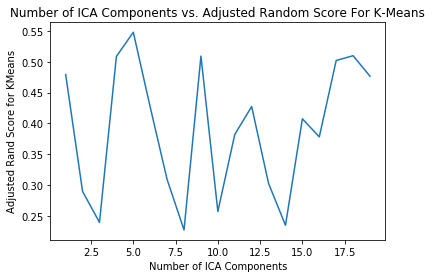

In [63]:
scores = []
ica_components = range(1,20,1)
all_intertia = []

for ic in ica_components:
    ica = FastICA(n_components=pc).fit(X)
    features = ica.transform(X)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    kmeans = KMeans(n_clusters=9).fit(features_scaled)
    score = metrics.adjusted_rand_score(y, kmeans.labels_)
    inertia = kmeans.inertia_
    all_intertia.append(inertia)
    scores.append(score)
    
maximum_index = scores.index(max(scores))
print ("Maximum rand score reached with PCA features: " + str(pca_components[maximum_index]))

plt.plot(ica_components, scores)
plt.xlabel("Number of ICA Components")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Number of ICA Components vs. Adjusted Random Score For K-Means')
plt.savefig('Number of ICA Components vs. Adjusted Random Score For K-Means.png')
plt.show()

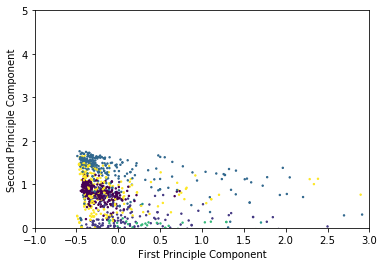

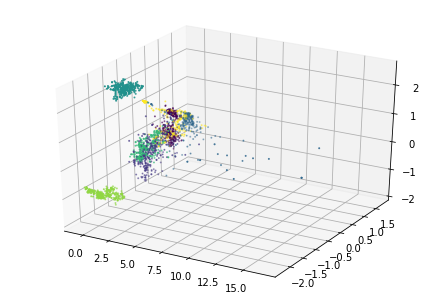

In [65]:
ica = FastICA(n_components=3).fit(X)
features = ica.transform(X)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

pca1, pca2, pca3 = zip(*features_scaled)

axes = plt.gca()
axes.set_xlim([-1.0,3.0])
axes.set_ylim([0.0,5.0])

plt.scatter(pca1, pca2, s=2, c=y)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

ax = Axes3D(fig=plt.figure())

ax.scatter(xs=pca1,ys=pca2,zs=pca3,s=1,c=y)

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastI

Maximum rand score reached with ICA features: 5


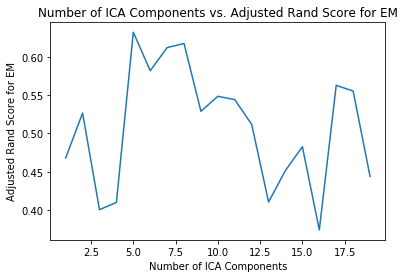

In [68]:
scores = []
ica_components = range(1,20,1)
all_intertia = []

for ic in ica_components:
    ica = FastICA(n_components=pc).fit(X)
    features = ica.transform(X)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    em = GaussianMixture(n_components=11).fit(features_scaled)
    labels = em.predict(features_scaled)
    score = metrics.adjusted_rand_score(y, labels)
    scores.append(score)
    
maximum_index = scores.index(max(scores))
print ("Maximum rand score reached with ICA features: " + str(ica_components[maximum_index]))

plt.plot(ica_components, scores)
plt.xlabel("Number of ICA Components")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Number of ICA Components vs. Adjusted Rand Score for EM')
plt.savefig('Number of ICA Components vs. Adjusted Rand Score for EM.png')
plt.show()

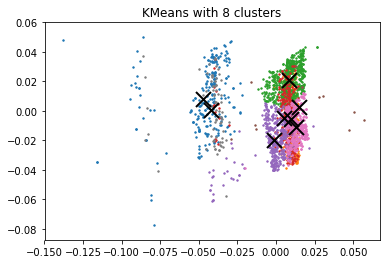

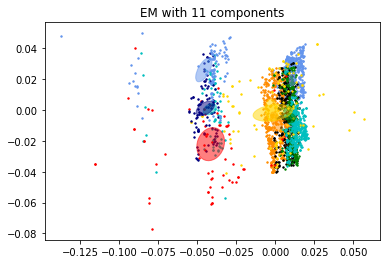

In [69]:
ica = FastICA(n_components=5).fit(X)
features = ica.transform(X)


kmeans = KMeans(n_clusters=8).fit(features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
draw_kmeans(features, labels, centroids, 8, "KMeans with 8 clusters")

em = GaussianMixture(n_components=11).fit(features)
plot_results_EM(features, em.predict(features), em.means_, em.covariances_, 2, "EM with 11 components")


### RP

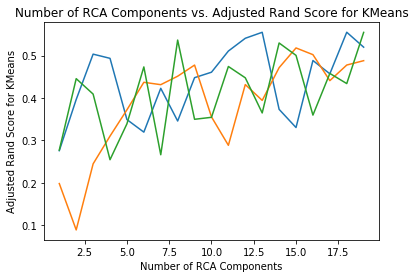

In [71]:
scores = []
random_components = range(1,20,1)


for i in range(3):
    for rc in random_components:
        rca = SparseRandomProjection(n_components=rc).fit(X)
        features = rca.transform(X)
        scaler = StandardScaler()
        scaler.fit(features)
        features_scaled = scaler.transform(features)
        kmeans = KMeans(n_clusters=9, random_state=2).fit(features_scaled)
        score = metrics.adjusted_rand_score(y, kmeans.labels_)
        scores.append(score)
    plt.plot(random_components, scores)
    scores = []
    

plt.xlabel("Number of RCA Components")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Number of RCA Components vs. Adjusted Rand Score for KMeans')
plt.savefig('Number of RCA Components vs. Adjusted Rand Score for KMeans.png')
plt.show()

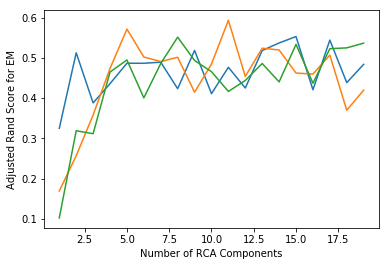

In [72]:
scores = []
random_components = range(1,20,1)


for i in range(3):
    for rc in random_components:
        rca = SparseRandomProjection(n_components=rc).fit(X)
        features = rca.transform(X)
        scaler = StandardScaler()
        scaler.fit(features)
        features_scaled = scaler.transform(features)
        em = GaussianMixture(n_components=11, random_state=2).fit(features_scaled)
        labels = em.predict(features_scaled)
        score = metrics.adjusted_rand_score(y, labels)
        scores.append(score)
    plt.plot(random_components, scores)
    scores = []
    

plt.xlabel("Number of RCA Components")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Number of RCA Components vs. Adjusted Rand Score for EM')
plt.savefig('Number of RCA Components vs. Adjusted Rand Score for EM.png')
plt.title('')
plt.show()